# Comprehensive Analysis of Customer Churn Data

This notebook provides an in-depth analysis of customer churn data, including exploratory data analysis (EDA), data cleaning, and insights to help understand customer behavior and factors contributing to churn.


### Importation of the neccesary libraries

In [35]:
#Importing the neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in of the data

In [36]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Overview

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [38]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Cleaning

In [39]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
#Checking total Number of missing values in the data
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## No missing values

In [41]:
#Checking for duplicates
data.duplicated().sum()

0

## No duplicate values

In [42]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# What is the distribution of the target variable (churn), and how does it relate to customer behavior?

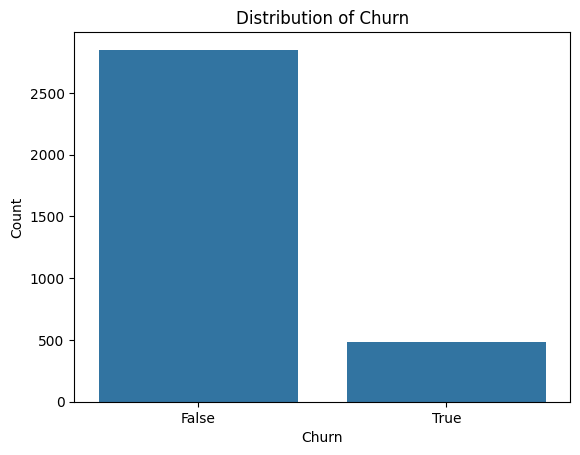

In [43]:
#Distrinutionof the target variable churn
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### We have a very low number of churned customers

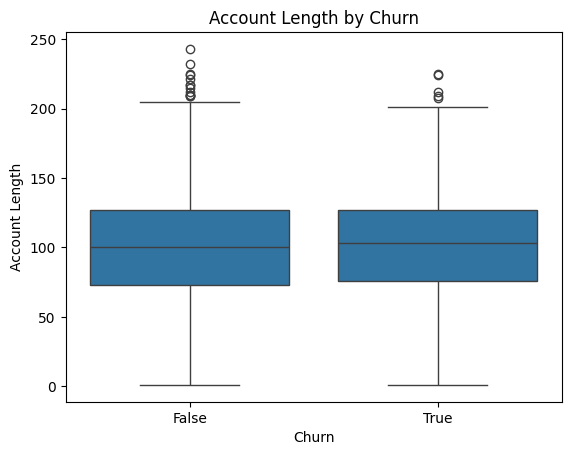

In [44]:
# Box plot for account length by churn
sns.boxplot(x='churn', y='account length', data=data)
plt.title('Account Length by Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()

### The finding suggests that customers who have churned tend to have a slightly longer account length compared to those who have not churned.

# Comparison of call minutes and charges between customers who churn and those who do not

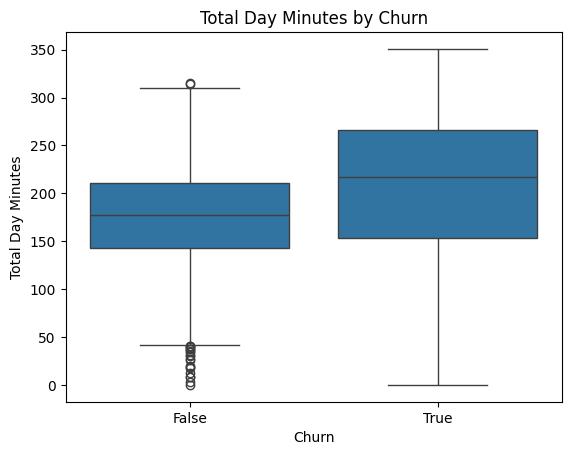

In [45]:
# Total day minutes by churn status
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

### The finding suggests that customers who have churned tend to use more total day minutes on average compared to those who have not churned.

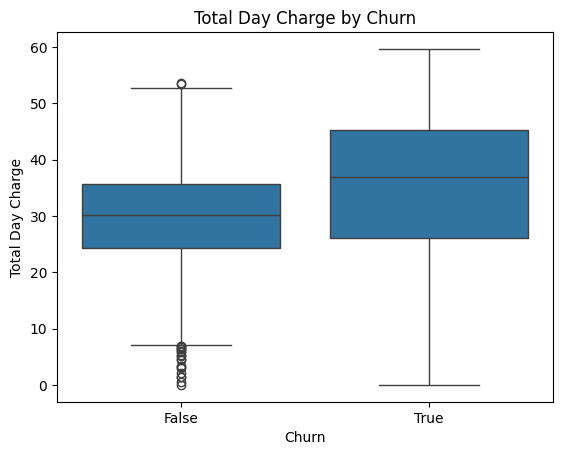

In [46]:
#Total day charge by Churn status
sns.boxplot(x='churn', y='total day charge', data=data)
plt.title('Total Day Charge by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

### The finding suggests that customers who have churned tend to have a higher median total day charge compared to those who have not churned.

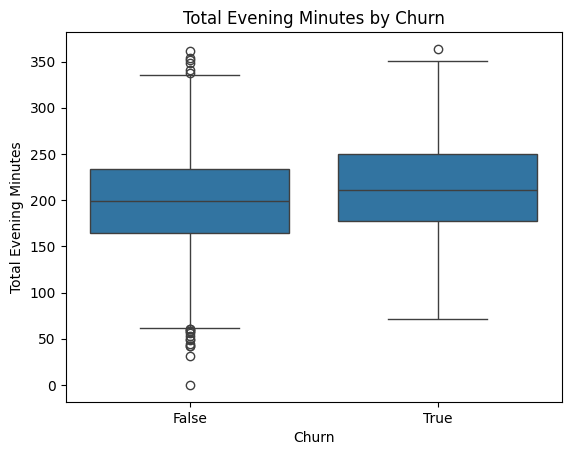

In [47]:
## Total evening minutes by churn status
sns.boxplot(x='churn', y='total eve minutes', data=data)
plt.title('Total Evening Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()

### The finding suggests that customers who have churned tend to use more total evening minutes on average compared to those who have not churned.

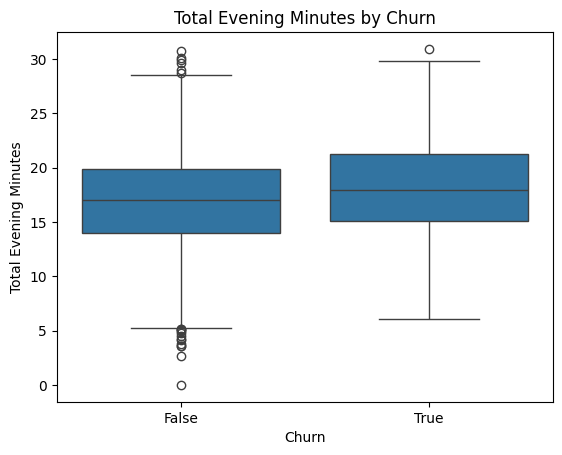

In [48]:
## Total evening charges by churn status
sns.boxplot(x='churn', y='total eve charge', data=data)
plt.title('Total Evening Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()

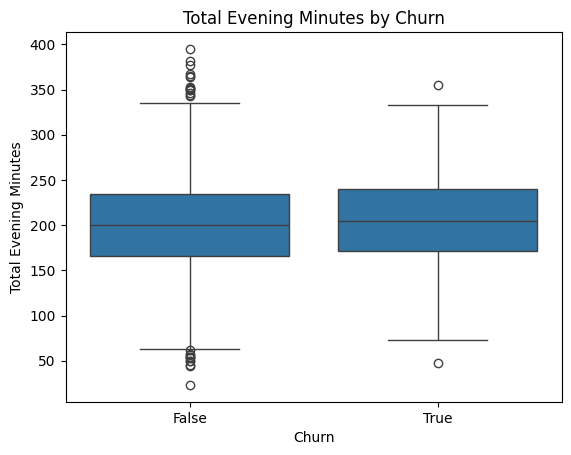

In [49]:
## Total night minutes by churn status
sns.boxplot(x='churn', y='total night minutes', data=data)
plt.title('Total Evening Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()

### The finding suggests that customers who have churned tend to use more total night minutes on average compared to those who have not churned.

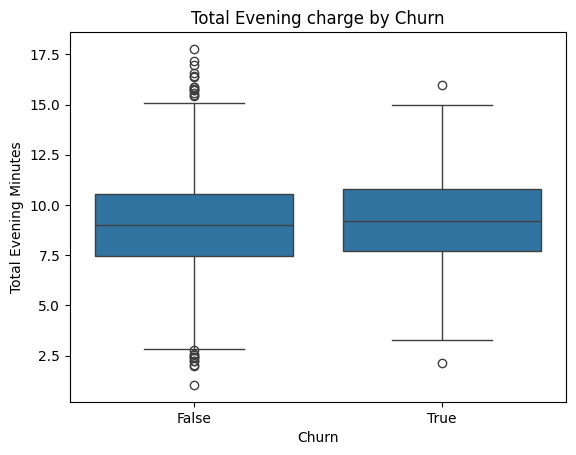

In [50]:
## Total night charges by churn status
sns.boxplot(x='churn', y='total night charge', data=data)
plt.title('Total Evening charge by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()

### The finding suggests that customers who have churned tend to use more total night charges on average compared to those who have not churned.

## Many customers who have churned it is due to hu=igh charge rates since they spend most of the time on calls

# Impact of having an international plan or voicemail plan on churn rates

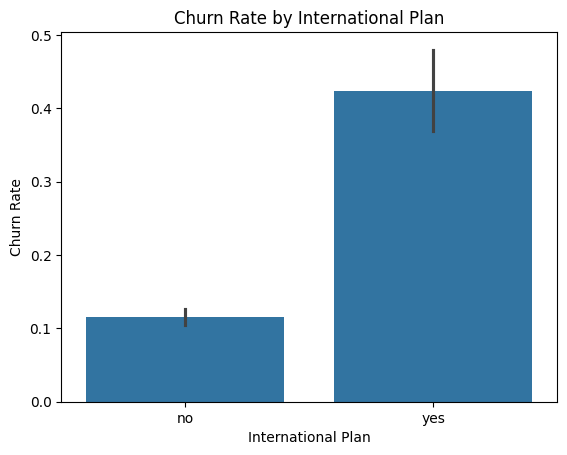

In [51]:
# Churn rate by international plan
sns.barplot(x='international plan', y='churn', data=data, estimator=lambda x: sum(x==1)/len(x))
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.show()

### Many customers who have churned mostly make international calls

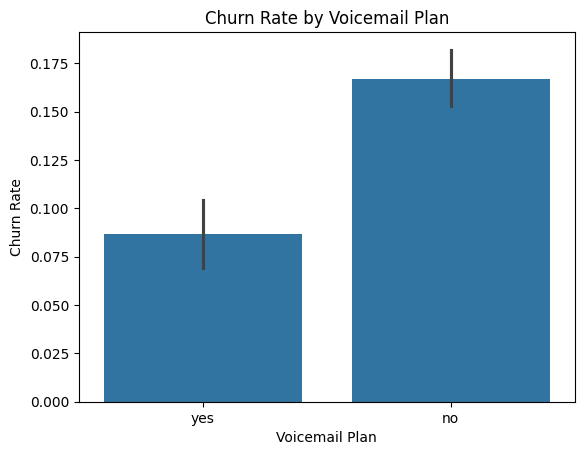

In [52]:
#Churn rate by voicemail plan
sns.barplot(x='voice mail plan', y='churn', data=data, estimator=lambda x: sum(x==1)/len(x))
plt.title('Churn Rate by Voicemail Plan')
plt.xlabel('Voicemail Plan')
plt.ylabel('Churn Rate')
plt.show()

### Those customers who are on voice mail plan, a very big percentage have not churned

### Most cutomers who are on International calls plan tend to churn more than those on voicemail plan

# Relationship between the number of customer service calls and likelihood of churn

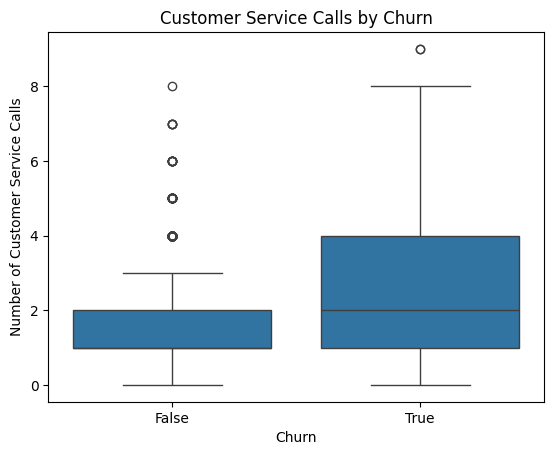

In [53]:
# Box plot for customer service calls by churn status
sns.boxplot(x='churn', y='customer service calls', data=data)
plt.title('Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()

### Most customers who make the cutomer service calls tend to churn more

## Key Findings and Recomendations

### Key Findings

## Customer Churn Analysis

### Key Insights:

- **Low Churn Rate**: The company maintains a relatively strong customer retention rate.

- **Longer Account Length and Churn**: Customers who have been with the company longer tend to churn, indicating that long-term users may require more attention to maintain engagement.

- **Higher Usage and Churn**: Churned customers show higher average usage in terms of day, evening, and night minutes, suggesting that heavy usage may be associated with higher churn risk.

- **Higher Charges for Churned Customers**: Churned customers have higher average charges, pointing to potential cost-related dissatisfaction.

- **International Call Activity**: A significant number of churned customers frequently make international calls, suggesting that this aspect of the service may be a pain point.

- **Retention of Voicemail Plan Customers**: Customers who use the voicemail plan have a higher retention rate, indicating this feature contributes positively to customer loyalty.


## Recommendations for Reducing Churn

### 1. Review Pricing Strategy
- Reassess the pricing models to address the concerns of high-usage customers.
- Consider introducing loyalty programs or more flexible pricing to reduce churn.

### 2. Improve International Call Services
- Enhance international call offerings to better meet customer expectations.
- Explore more competitive pricing or value-added services to appeal to this segment.

### 3. Proactive Engagement for Long-Term Users
- Implement targeted engagement strategies for long-term customers.
- Identify and mitigate churn risks by focusing on their evolving needs.

### 4. Promote and Enhance Voicemail Plans
- Leverage the positive impact of the voicemail plan by promoting it more widely.
- Enhance its features to maximize customer retention.

### 5. Targeted Retention Campaigns
- Develop tailored retention campaigns for customers with high usage.
- Use predictive models to identify signs of potential churn and intervene proactively.

### 6. Customer Experience Optimization
- Improve the overall customer experience by addressing areas that contribute to higher charges and dissatisfaction.
- Ensure that the value provided aligns with customer expectations.
